In [1]:
pip install xgboost


     ---------------------------------------- 99.7/99.7 MB 1.9 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy  as np
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier
import xgboost as xgb

In [18]:
horse = pd.read_csv(r"C:\Users\admin\Downloads\horse.csv")

In [4]:
target = horse[['outcome']]

In [5]:
features = horse.drop('outcome',axis=1)

In [6]:
features = pd.get_dummies(features)

In [7]:
x_train,x_test,y_train,y_test = train_test_split(features,target,train_size=0.75,random_state=70)

In [8]:
simple_impute = SimpleImputer(missing_values=np.nan,strategy='mean')

In [9]:
x_train = simple_impute.fit_transform(x_train)
x_test = simple_impute.fit_transform(x_test)

In [10]:
dec_tree = DecisionTreeClassifier(criterion = "gini", splitter = "random", max_depth = 4)

In [11]:
dec_tree.fit(x_train,y_train)


DecisionTreeClassifier(max_depth=4, splitter='random')

In [12]:

y_pred = dec_tree.predict(x_test)


In [13]:
accuracy_score(y_test,y_pred)

0.6533333333333333

In [14]:
confusion_matrix(y_test,y_pred)

array([[14,  0,  9],
       [ 3,  0,  8],
       [ 4,  2, 35]], dtype=int64)

In [20]:
from sklearn.tree import plot_tree

[Text(0.5446428571428571, 0.9, 'X[21] <= 0.882\ngini = 0.546\nsamples = 224\nvalue = [54, 33, 137]\nclass = lived'),
 Text(0.2857142857142857, 0.7, 'X[6] <= 35.86\ngini = 0.638\nsamples = 134\nvalue = [46, 28, 60]\nclass = lived'),
 Text(0.14285714285714285, 0.5, 'X[16] <= 0.689\ngini = 0.613\nsamples = 102\nvalue = [46, 15, 41]\nclass = died'),
 Text(0.07142857142857142, 0.3, 'X[37] <= 0.927\ngini = 0.59\nsamples = 57\nvalue = [17, 9, 31]\nclass = lived'),
 Text(0.03571428571428571, 0.1, 'gini = 0.502\nsamples = 43\nvalue = [11, 4, 28]\nclass = lived'),
 Text(0.10714285714285714, 0.1, 'gini = 0.643\nsamples = 14\nvalue = [6, 5, 3]\nclass = died'),
 Text(0.21428571428571427, 0.3, 'X[60] <= 0.842\ngini = 0.518\nsamples = 45\nvalue = [29, 6, 10]\nclass = died'),
 Text(0.17857142857142858, 0.1, 'gini = 0.473\nsamples = 42\nvalue = [29, 5, 8]\nclass = died'),
 Text(0.25, 0.1, 'gini = 0.444\nsamples = 3\nvalue = [0, 1, 2]\nclass = lived'),
 Text(0.42857142857142855, 0.5, 'X[7] <= 2.061\ngin

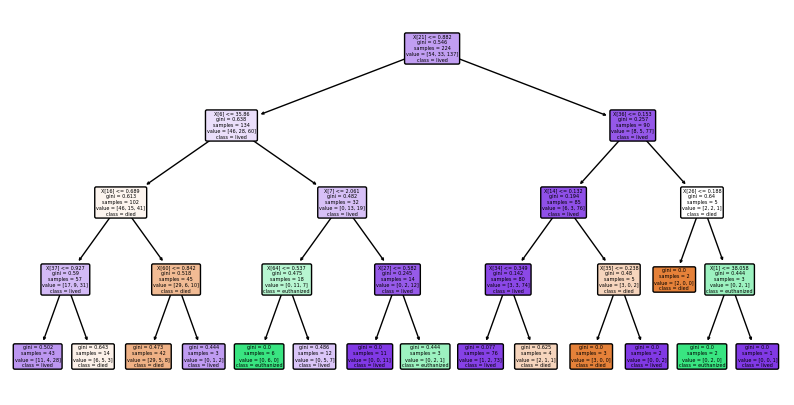

In [21]:
plt.figure(figsize=(10,5))
plot_tree(dec_tree,filled=True,rounded=True,class_names=horse.outcome,feature_names=horse.get(features))